<a href="https://colab.research.google.com/github/MMoronto/pytorch_exercises/blob/master/Pytorch_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Fundamentals**

In [1]:
import torch
torch.__version__

'2.0.0+cu118'

Creating tensors

In [2]:
# Create a scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
# Get the Python number within a one-element tensor
scalar.item()

7

In [5]:
# Create a vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
#check the number of dimensions of vector
vector.ndim

1

In [7]:
# Check shape of vector
vector.shape

torch.Size([2])

In [8]:
# Matrix
matrix = torch.tensor([[7, 8],
                      [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
matrix.ndim

2

In [10]:
matrix.shape

torch.Size([2, 2])

In [11]:
# Let's make a tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

In [14]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.8212, 0.0348, 0.4011, 0.7496],
         [0.2913, 0.3388, 0.7368, 0.7521],
         [0.5087, 0.5511, 0.6587, 0.2175]]),
 torch.float32)

In [15]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [16]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [17]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [18]:
# Use torch.arange(). 
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
# Create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # Defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # Defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [21]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

In [22]:
# create a tensor and find out details about it
some_tensor = torch.rand(3, 4)

# Find out details about the tensor
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.3106, 0.5541, 0.9333, 0.0927],
        [0.4186, 0.0209, 0.2174, 0.3022],
        [0.1476, 0.3941, 0.9749, 0.8058]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [23]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long)
int_32_tensor

tensor([3, 6, 9])

In [24]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

## **Tensor Ops**

In [25]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [26]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [27]:
# Tensors don't change unless they are reassigned
tensor

tensor([1, 2, 3])

In [28]:
# Subtract and reassign
tensor = tensor - 10
tensor 

tensor([-9, -8, -7])

In [29]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [30]:
# Use built-in pytorch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [31]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [32]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [33]:
# Element-wise multiplication and matrix multiplication
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape 

torch.Size([3])

In [34]:
# Element-wise and matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [35]:
# Matrix multiplicatiion
torch.matmul(tensor, tensor)


tensor(14)

In [36]:
# A not so recommended symbol for matrix multiplication
tensor @ tensor

tensor(14)

In [37]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 985 µs


tensor(14)

In [38]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 323 µs, sys: 64 µs, total: 387 µs
Wall time: 350 µs


tensor(14)

In [39]:
# # inner dimensions need to match for matrix multiplication to work
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

# torch.matmul(tensor_A, tensor_B) # this won't work because the inner dimensions don't match

In [40]:
# When inner dimensions don't match, you can use the transpose function to enable the multiplication work
print(tensor_A)
print(tensor_B.T)

print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [41]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [42]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [43]:
# Find max, min, sum, etc. (aggregation)
print(f"Minumum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this gives us an error
print(f"Mean: {x.type(torch.float32).mean()}") # wont work w/o float datatype
print(f"Sum: {x.sum()}")

Minumum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [44]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [45]:
#Positional min/max

#create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Return index of max & min vals
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")



Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


In [46]:
# Change tensor datatype

#create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [47]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [48]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

In [49]:
# RESHAPING, STACKING, SQUEEZING & UNSQUEEZING

#create a tensor
import torch

x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [50]:
# Let's add an extra dimension w/ torch.reshape()

#Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [51]:
# Let's change the view with torch.view()

#Change view (keeps same data as original but changes view)
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [52]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [53]:
# Stack tensors on top of each other five times
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [54]:
# try changing dim to dim=1
x_stacked = torch.stack([x, x, x, x], dim=1) 
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [55]:
#removing all single dimensions from a tensor

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Rename extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [56]:
# adding a dimension value of 1 at a specific index
# torch.unsqueeze()

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")


Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [57]:
# Create tensor w/ specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [58]:
# Indexing (selecting data from tensors)

#Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [59]:
#How to index bracket by bracket
#indexing vals goes from outer dimension -> inner dimension

print(f"First square bracket: \n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [60]:
# Index the middle bracket
x[0, 0], x[0][0]

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [61]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [62]:
# Get all values of 0th & 1st dimension but only the index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [63]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [64]:
# Get index 0 of 0th and last dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

**PYTORCH TENSORS & **NUMPY**

In [65]:
# Numpy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
# tensor = torch.from_numpy(array) .type(torch.float32)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [66]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

If you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`

In [67]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [68]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [69]:
# Reproducability

import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.2709, 0.6752, 0.9635, 0.9948],
        [0.3304, 0.6219, 0.8908, 0.1542],
        [0.2228, 0.2947, 0.2381, 0.9712]])

Tensor B:
tensor([[0.3021, 0.2390, 0.5264, 0.4911],
        [0.0081, 0.3042, 0.3748, 0.8463],
        [0.6476, 0.3428, 0.7219, 0.0924]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [70]:
# To make random but reproducible tensors
import torch
# Set the random seed
RANDOM_SEED=45
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# HAve to reset the seed every time a new rand() is called
# W/O this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) 
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor_C equal Tensor_D?(anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Tensor D:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Does Tensor_C equal Tensor_D?(anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi`

In [71]:
#check if you've got access to a Nvidia GPU
!nvidia-smi

Fri May  5 17:48:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Getting PyTorch to run on the GPU

In [72]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [73]:
# Create a device variable to store what kind of device is available.

#Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [74]:
# Count number of devices
torch.cuda.device_count()

1

**Putting tensors (and models) on the GPU**

You can put tensors on a specific device by calling to

*   List item
*   List item

(device) on them.

In [75]:
# creating a tensor and putting it on the GPU (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

**Moving tensors back to the CPU**

In [76]:
# If tensor is on GPU, can't transform it to NumPy (will give error)

# tensor_on_gpu.numpy()

Instead, to get a tensor back to CPU and usable with NumPy we can use `Tensor.cpu()`.



In [77]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [78]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

# **PyTorch Workflow Fundamentals**

In [79]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'

# Data Prep & Loading

In [80]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split data into training and test sets

Before we build a modelthat can learn the relationship between x (features) and y (labels), we need to split our data into a training and a test set(& when needed, a validation set).

In [81]:
# Create train/test split
train_split = int(0.8 * len(x)) # 80% of data used for training set, 20% for testing set
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

Create a function to visualize data

In [82]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data & compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

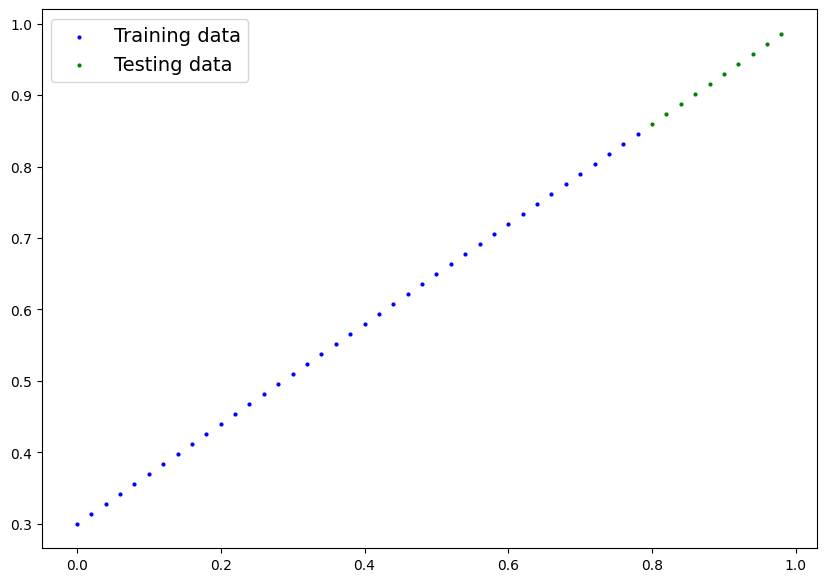

In [83]:
plot_predictions();

# Build Model

We'll build a model to use the blue dots to predict the green dots.

Let's start by replicating a standard linear regression model using pure PyTorch.

In [84]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch defaults to float32
                             requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x * self.bias # <- this is the linear regression formula (y = m*x + b)

create a model instance with the class we've made & check it's parameters using `.parameters()`

In [85]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can get the state(i.e. the content of the model) of the model using `.stat_dict()`

In [86]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making Predictions using `torch.inference_mode()`

TO check this we can pass in the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

In [87]:
# Make predictions with model
with torch.inference_mode():  # this is a context manager--we use it to make predictions(i.e. inference)
  y_preds = model_0(x_test)

In [88]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.0347],
        [0.0356],
        [0.0364],
        [0.0373],
        [0.0382],
        [0.0390],
        [0.0399],
        [0.0408],
        [0.0416],
        [0.0425]])


 Let's visualize our predictions with the `plot_predictions()` function we created above.

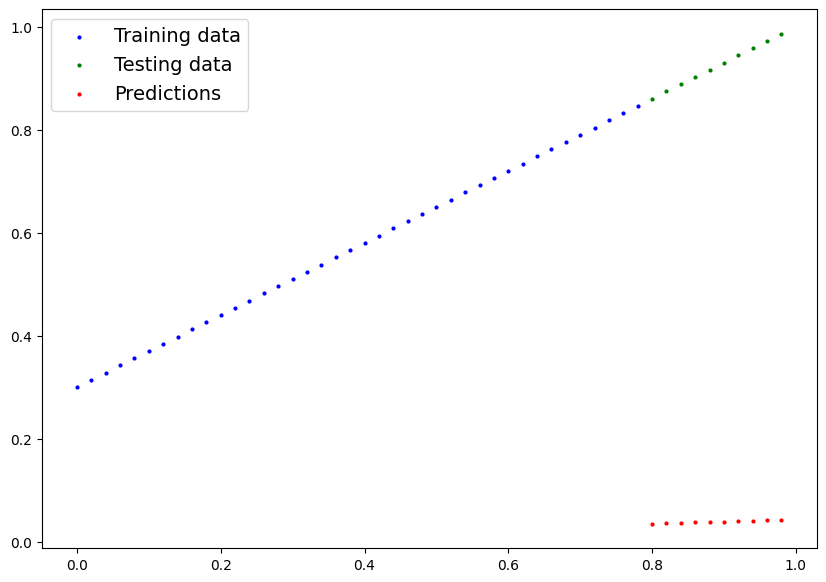

In [89]:
plot_predictions(predictions=y_preds)

In [90]:
y_test - y_preds

tensor([[0.8253],
        [0.8384],
        [0.8516],
        [0.8647],
        [0.8778],
        [0.8910],
        [0.9041],
        [0.9172],
        [0.9304],
        [0.9435]])

Our predictions look pretty bad since our model is just using random parameter values to make predictions. It needs to look at the blue dots to try to predict the green dots. We do this by training our model.

# 3. Train model

Right now our model is using random parameters to make calculations. It's guessing blindly.

To fix that we can update its internal params/patterns, the weights & bias values we set randomly using `nn.Parameter()` & `torch.randn()` to be something that better represents the data.

Most times we won't know what the ideal params are for a model, instead we write code to see if the model can try & figure them out itself.

## Creating a loss function and optimizer in PyTorch

For our model to update its params on its own, we'll need to add a **loss function** & an **optimizer** to it.


**Loss function**	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). The Lower the better.	

PyTorch has plenty of built-in loss functions in torch.nn.	

Some common loss function values are: Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`).

**Optimizer**	Tells your model how to update its internal parameters to best lower the loss.

You can find various optimization function implementations in `torch.optim`.

Some common optimizer values are: Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).

Lets create a loss function & an optimizer we can use to improve out model.

In [91]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

## Creating an optimization loop in PyTorch

The next step is to create a training and a testing loop for our model.

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data(the model never sees the testing data during training).

We'll use a Python `for` loop to accomplish this step.

In [92]:
torch.manual_seed(42)

# Set the number of epochs (the number of times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calc the loss (how diff are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Calc loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5560861229896545 | MAE Test Loss: 0.8839500546455383 
Epoch: 10 | MAE Train Loss: 0.5540589094161987 | MAE Test Loss: 0.8792990446090698 
Epoch: 20 | MAE Train Loss: 0.5519170761108398 | MAE Test Loss: 0.8743834495544434 
Epoch: 30 | MAE Train Loss: 0.5496475696563721 | MAE Test Loss: 0.869173526763916 
Epoch: 40 | MAE Train Loss: 0.5472366213798523 | MAE Test Loss: 0.8636374473571777 
Epoch: 50 | MAE Train Loss: 0.5446696281433105 | MAE Test Loss: 0.8577418327331543 
Epoch: 60 | MAE Train Loss: 0.5419310331344604 | MAE Test Loss: 0.8514509201049805 
Epoch: 70 | MAE Train Loss: 0.5390040874481201 | MAE Test Loss: 0.8447263836860657 
Epoch: 80 | MAE Train Loss: 0.5358710885047913 | MAE Test Loss: 0.8375275731086731 
Epoch: 90 | MAE Train Loss: 0.5325131416320801 | MAE Test Loss: 0.829810619354248 
Epoch: 100 | MAE Train Loss: 0.5289098024368286 | MAE Test Loss: 0.8215289115905762 
Epoch: 110 | MAE Train Loss: 0.5250392556190491 | MAE Test Loss: 0.81263220310

Notice how our loss is decreasing with each epoch. We can plot this to visualize it better.

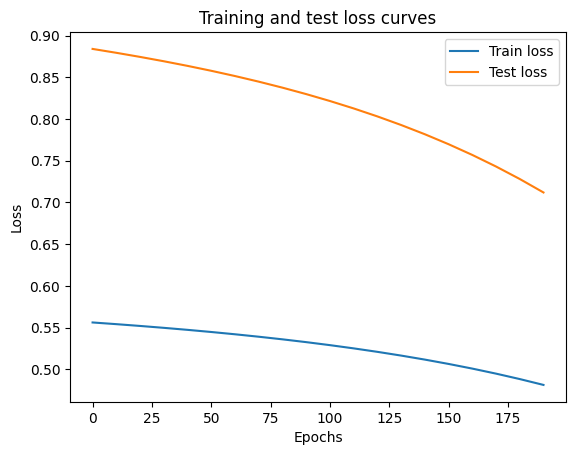

In [93]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The **loss curves** show the loss diminishing over time. Remember, loss is a measure of how wrong the model is, so the lower the better.

In [94]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5545])), ('bias', tensor([0.4594]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Our model got very close to calculate the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

## 4. Making predictions with a trained PyTorch model (inference)

Our model is trained and we want to make predictions with it.

There are three things to keep in mind when making predictions (AKA performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`.

2. Make the predictions using the inference mode context manager(`with torch.inference_mode(): ...`).

3. All predictionsshould be made with objects on the same device(i.e data & model on GGPU only or data and model on CPU only).

In [95]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calcs are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model
  # are on the CPU by default.
  # model_0.to(device)
  # x_test = x_test.to(device)
  y_preds = model_0(x_test)
y_preds

tensor([[0.2038],
        [0.2089],
        [0.2140],
        [0.2191],
        [0.2242],
        [0.2293],
        [0.2344],
        [0.2395],
        [0.2446],
        [0.2497]])

We can visualize the predictions we just made with our trained model

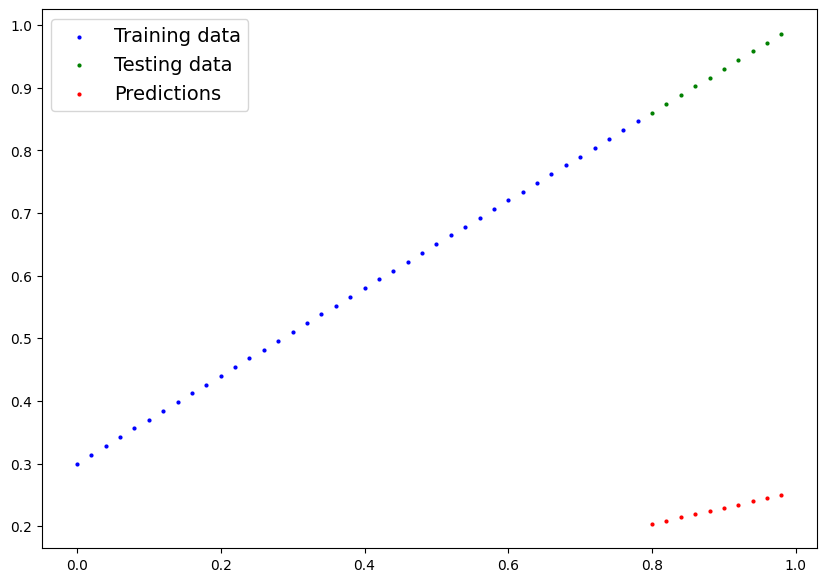

In [96]:
plot_predictions(predictions=y_preds)


## 5. Saving and loading a PyTorch model

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

### Saving a PyTorch model's `state_dict()`

We can do this in the following steps:

1. We'll create a directory for saving models using Python's `pathlib` module.

2. We'll create a file path to save the model to.

3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

In [97]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [98]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 May  5 17:48 models/01_pytorch_workflow_model_0.pth


## Loading a saved PyTorch model's `state_dict()`



We'll test out our model by using the flexible method of saving and loading the `state_dict()` and comparing it with another instance of 'LinearRegressionModel()` which has `load_state_dit()` as an in-built method.

In [99]:
# Intantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

Let's perform inference on our test data with our loaded model to verify if our model performs as expected.

In [100]:
# 1. Put the dedmodel into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test) # perform a forward pass on the test data with the loaded model

Let's check if the predictions we've made with the loaded model matches the previous predictions.

In [101]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

We verify that the model predictions are the same as the previous model predictions(predictions made prior to saving). This indicates our model is saving and loading as expected.

#6. Recap
## Let's put everything we've done so far together

In [102]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'

We can make our code device agnostic by setting `device="cuda"` if it is available, otherwise it'll default to `device="cpu"`.

In [103]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

Let's create some data.

We'll hard code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our x values.

Finally, we'll use the x values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * x + bias`).

In [104]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
x = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors wil happen later on (shapes within linear layers)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

We'll split our newly created data into an '80/20 split' with 80% training data and 20% testing data.

In [105]:
# Split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

we'll visualize our split data to ensure they look right.

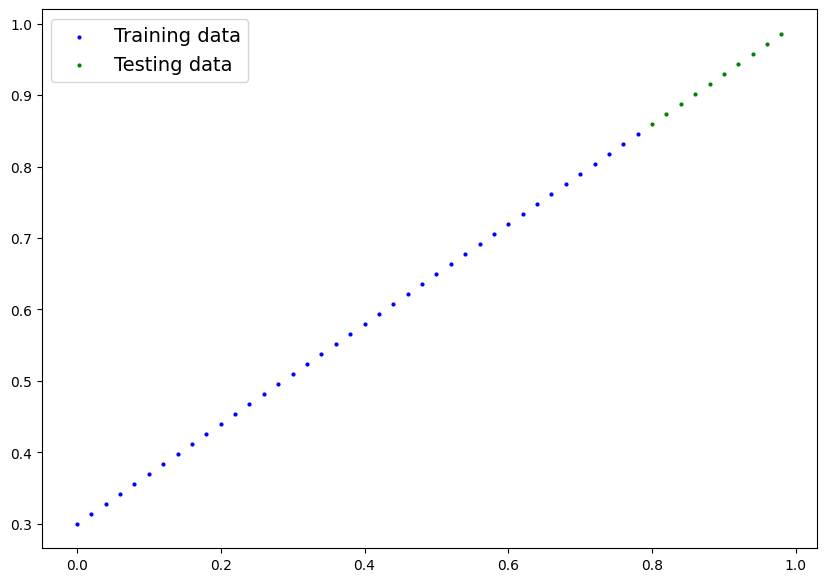

In [106]:
plot_predictions(x_train, y_train, x_test, y_test)

### 6.2 Building a PyTorch linear model

With our data, we'll create the same style of model as before except this timewe'll use `nn.Linear(in_features, out_features)` to define the weight and bias parameters of our model instead of doing it manually using `nn.Parameter()`.

In [107]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but... )
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [108]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [109]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or cpu if not
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

We'll build a training and testing loop at this point. We'll need a loss function and an optimizer to achieve this.

We'll use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training.

We'll use a learning rate of `0.1` since it worked well the last time around.

In [110]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                              lr=0.01)

With our loss function and optimizer ready, we can proceed to train and evaluate our model using a training and testing loop.

In [111]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
#without this, errors will happen
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ###Training
  model_1.train() #train mode is the default after construction

  # 1. Forward pass
  y_pred = model_1(x_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval() # put the model in evaluation mode for testing (inference)
  # 1. Forward pass
  with torch.inference_mode():
    test_pred = model_1(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


The loss looks pretty low.

We'll check the parameters our model has learned and compare them to the original parameters we hard coded in this next step.

In [112]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print
print("The model learned the following values for weights and biases:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and biases are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and biases:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and biases are:
weights: 0.7, bias: 0.3


### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [113]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

Now let's plot our model's predictions

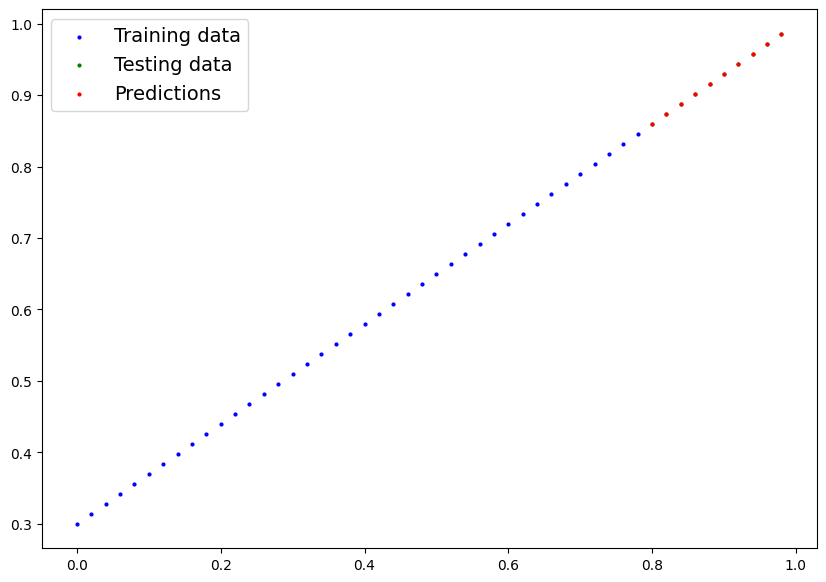

In [114]:
# plot_predictions(predictions=y_preds) # -> won't work ... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Observe how the red dots line up almost perfectly with the green dots.

### 6.5 Saving and loading a model

Let's try to save our model & it's predictions so we can use it later.

In [115]:
#from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


Let's load it back in to make sure everything works well.
To do this we'll:



*   Create a new instance of the `LinearRegressionModelV2()` class
*   Load in the model state dict using `torch.nn.Module.load_state_dict()`
*   Send the new instance of the model to the target device(to ensure our code is device-agnostic)

In [116]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on a GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [117]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Everything adds up. We've built and trained our first two neural network models in PyTorch!!

# PyTorch Neural Network Classification

A classification problem involves predicting whether something is one thing or another. In other words, taking a set of inputs and predicting what class those set of inputs belong to.


**Prob Type**..........**What is it?**..............................**Example**

**Binary**.................Target can be one of two......Predict whether or not.     
**classification**......options, e.g. yes or no..........someone has heart disease
                                                   based on their health 
                                                   parameters

**Multi-class**.........Target can be one of more.....Predict whether a photo is of

**classification**......than two options....................food, a person or a dog.

**Multi-label**..........Target can be assigned..........Predict what categories

**classification**.......more than one option............should be assigned to a 
                                                   Wikipedia article.

## 1. Make classification data and get it ready

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different colored dots.

In [118]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same vals.

Let's view the first 5 `X` and `y` values.

In [119]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Notice how we have two `X` values per one `y` value.

In [120]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


We can notice how each pair of `X` features (`X1` and `X2`) has a label(`y`) value of either 0 or 1.
This tells us that our problem is a binary classification since there are only two options (0 or 1).
Let's figure out how many values of each class there are.

In [121]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

It turns out there are 500 each. We'll go ahead & plot them.

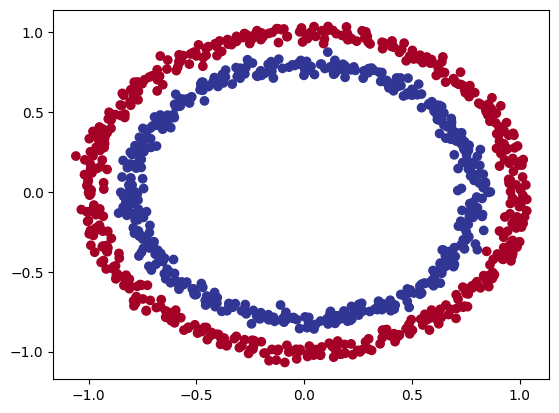

In [122]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In our subsequent steps, we're going to find out how we could build a PyTorch neural network to classify dots into red(0) or blue(1).

### 1.1 Input and output shape

In [123]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

We have a match on the first dimension of each. There are 1000 `X` and 1000 `y`.
We need to figure out the second dimension on `X` by viewing the values and shapes of our single sample (features and labels).

In [124]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


This tells us the second dimension for `X` has two features(it is a vector) whereas `y` has a single feature(it is a scalar).
We have two inputs for one output.

### 1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

We'll need to:

1. Turn our data into tensors (rcurrently our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).

2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).


In [125]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Our data is now in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function `train_test_split()` from Scikit_Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [126]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 20% train
                                                    random_state=42) # make the random split reproducible
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

So we now have 800 training samples and 200 testing samples.

## 2. Building a model

To build our model we need to do the following steps:

1. Set up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Construct a model by subclassing `nn.module`.
3. Define a loss function and optimizer.
4. Create a training loop(we'll do this in the next section).

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [127]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

We want to create a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

i.e. given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as **supervised learning** because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes `X` and `y`.

Let's create a model class that:L

1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Create 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [128]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

  # 3. Define a forward method containing the forward pass computation
  def forward(self, x):
      # Return the output of layer_2, a single feature, the same shape as y
      return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [129]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Notice how this looks much simpler than subclassing `nn.Module`, why not just always use `nn.Sequentisl`?

`nn.Sequential` is great for straight-forward computations but it always runs in sequential order. If an alternate computation method is required, we'd want to define our own custom `nn.module` subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [130]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.6114],
        [0.6168],
        [0.5807],
        [0.6201],
        [0.5544],
        [0.5579],
        [0.5939],
        [0.5800],
        [0.5819],
        [0.6168]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Different problem types require different loss functions. For instance, a regression problem(predicting a number) might require mean absolute error(MAE) loss. Binary classification problems (like this one) often require binary cross entropy as the loss function.
The same optimizer function can often be used across different problem spaces. For instance, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, so can the Adam optimizer(`torch.optim.Adam()`).

Since we're working with binary classification problem, let's use a binary cross entropy loss function.

PyTorch has two binary cross entropy implementations:

1. `torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between the target (label) and input(features).
2. `torch.nn.BCEWithLogitsLoss()` - This is the same as above except it has a sigmoid layer (`nn.Sigmoid`) built-in (we'll see what this means soon).

Generally implementation 2 is the better option as it is more stable. We'll go ahead and create a loss function and an optimizer.

FOr the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.



In [131]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built - in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

We'll create an **evaluation metric** in the next step. An evaluation metric can be used to offer another perspective on how a model is functioning. While a loss function measures the wrogness of a model, the evaluation metrics measures how right it is. While several evaluation metrics are appropriate for classification problems, we'll start with **accuracy**.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

In [132]:
# Calculate accuracy (a classifiication metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

We can now use this function whilst training our model to measure it's performance alongside the loss.

## 3. Train model

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [133]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.6114],
        [0.6168],
        [0.5807],
        [0.6201],
        [0.5544]], device='cuda:0', grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random. They're the output of our `forward()` method which implements two layers of `nn.Linear()` which internally calls the following equation:
              ** *y = x * Weights + bias* **

The raw outputs (unmodified) of this equation (y) and in turn, the raw outputs of our model are often referred to as logits. Our model above outputs logits when it takes in the input data(x in the equation or `X_test` in the code). 
We can use the **sigmoid activation function** to get our model's raw outputs(logits) into a numerical form thats comparable to our truth labels.

In [134]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6483],
        [0.6495],
        [0.6412],
        [0.6502],
        [0.6352]], device='cuda:0', grad_fn=<SigmoidBackward0>)

While our outputs are still random, they now have some consistency as they are now in the form of **predictio probabilities**, i.e. `y_pred_probs`. The values are a representation of how much the model thinks the data point belongs to one class or another.
Wince we're dealing with a binary classification, our ideal outputs are 0 or 1. These values are our decision boundary.



*   If `y_pred_probs` >= 0.5, `y=1` (class 1)
*   If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoiud activation function.



In [135]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

We observe how our model's predictions are now in the same form as our truth tables (`y_test`).

In [136]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

THis means we'll be able to compare our models predictions to the test labelks to see how well it's going.

To recap, we converted our model's raw outputs(logits) to prediction probabilities using a sigmoid function.
We then converted the prediction to prediction labels by rounding them.

**Note** The use of the sigmoid activation function is often only for binary classification logits.
For multi-class classification, we'll use the softmax activation function (this will come later on).

### 3.2 Building a training and testing loop

---

In the previous tep we converted our raw model outputs into predictioin labels, in this step we'll build a training loop.

Let's start by training for 100 epochs and outputting the model's progress every 10 epochs.


In [137]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass (model outputs raw logits)
  y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimension, this won't work unless the model & data are on the same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

  # 2 Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
  #               y_train)
  loss = loss_fn(y_logits, # Using BCEWithitsLoss works with raw logits
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print out what's happeening every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73502, Accuracy: 50.00% | Test loss: 0.73273, Test acc: 50.00%
Epoch: 10 | Loss: 0.71197, Accuracy: 50.00% | Test loss: 0.71086, Test acc: 50.00%
Epoch: 20 | Loss: 0.70210, Accuracy: 50.00% | Test loss: 0.70152, Test acc: 50.00%
Epoch: 30 | Loss: 0.69767, Accuracy: 50.00% | Test loss: 0.69740, Test acc: 50.00%
Epoch: 40 | Loss: 0.69556, Accuracy: 50.00% | Test loss: 0.69551, Test acc: 50.00%
Epoch: 50 | Loss: 0.69450, Accuracy: 50.00% | Test loss: 0.69463, Test acc: 50.00%
Epoch: 60 | Loss: 0.69393, Accuracy: 57.25% | Test loss: 0.69421, Test acc: 56.50%
Epoch: 70 | Loss: 0.69360, Accuracy: 56.38% | Test loss: 0.69401, Test acc: 52.50%
Epoch: 80 | Loss: 0.69339, Accuracy: 53.37% | Test loss: 0.69392, Test acc: 53.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 52.88% | Test loss: 0.69390, Test acc: 51.00%


Our model seems to have gone through the training and testing steps okay but the results don't seem to have improved much. The accuracy barely moves above 50% on each data split.
Since we are working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

## 4. Make predictions and evaluate the model

It looks like our model is guessing randomly. Let's visualize our model by plotting our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 and class 1.

We'll write some code to download and import the `helper_functions.py script` from the `Learn PyTorch for Deep Learning repo`.
We'll also import `plot_predictions()`.

In [138]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


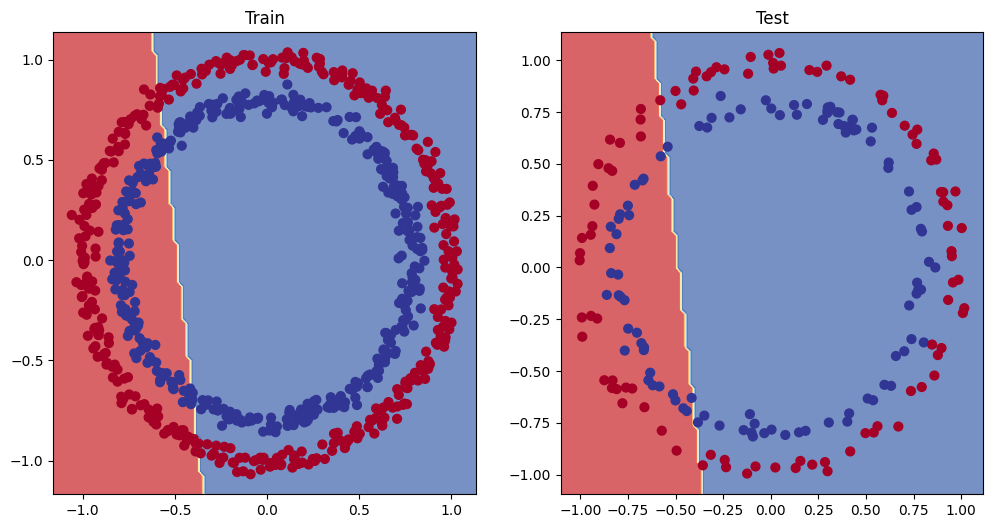

In [139]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


Our model appears to be underfitting, meaning it is not learning predictive patterns from the data. It's currently trying to split the red and blue dots using a straight line and this does not work since our data is circular, a straight line can at best cut it down the middle. We'll try and improve this in the following steps.

## 5. Improving a model

Let's try to improve our model's underfitting problem. There are several model improvement techniques we could consider.

We could:

**Add more layers.** Make the neural network deeper

**Add more hidden units.** Make the  neural network wider

**Use longer epochs(fit for longer)** Give model more opportunities to look at the data

**Change the activation function.** Use non-linear activation functions

**Change the learning rate.** caliberate the learning rate appropriately to arrive at an acceptable learning outcome

**Change the loss function** Select the appropriate loss functioin for the data type

**Use transfer learning.** TAke a pretrained model from a problem domain similar to yours and adjust it to your own problem.

All of these are adjustable by hand and are referred to as **Hyperparameters**.

Let's try to improve our model using the same staeps as above with a few changed hyperparameters. We'll add an extra layer to our model, fit our model for longer epochs(`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

In [140]:
class CircleModelV1(nn.Module):
    def __init__(self):
      super().__init__()
      self.layer_1 = nn.Linear(in_features=2, out_features=10)
      self.layer_2 = nn.Linear(in_features=10, out_features=10) #extra layer
      self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
      return self.layer_3(self.layer_2(self.layer_1(X)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

With our model setup, we'll recreate a loss function and an optimizer instance using the same settings as before.

In [141]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

We've set up our model, optimizer and loss function. We'll go ahead and set up a training loop in the next step.

In [142]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### TRaining
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. Calculate loss/accuracy
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
      
      # Print out what's happening every 10 epochs
      if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    
    

Epoch: 0 | Loss: 0.69396, accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


Training the model for longer and adding an extra layer did not yield noteworthy improvements. Our model did not learn any patterns better than random guessing.

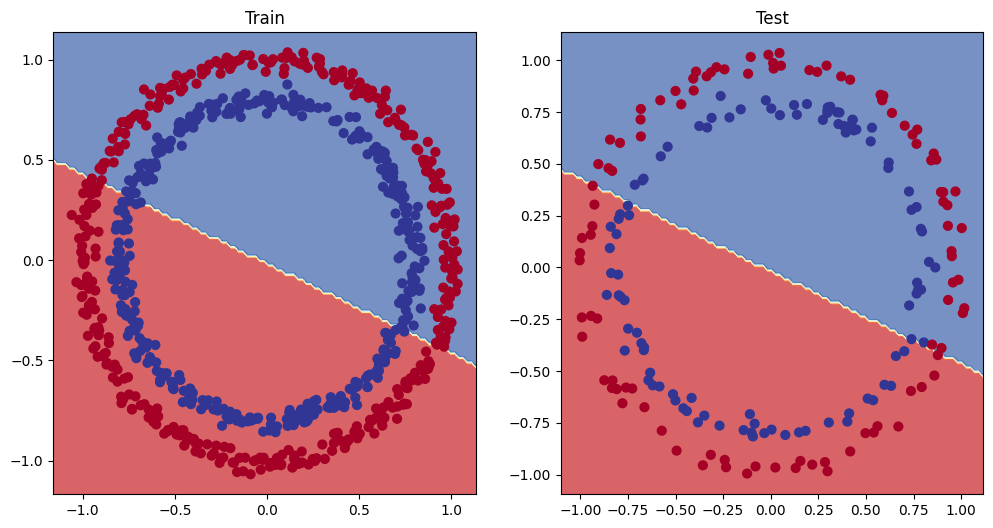

In [143]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

We visualize our model and observe it is still drawing a straight li8ne between the blue & red dots. We'll create some linear data in the next step to see if our model can learn from linear data instead.

### 5.1 Preparing data to see if our model can model a straight line

Let us create some linear data to see if our model is able to model it

In [144]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:15], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

We'll split our data into training and test sets in the next step.

In [145]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each split
print(len(X_train_regression),
      len(y_train_regression),
      len(X_test_regression),
      len(y_test_regression))

80 80 20 20


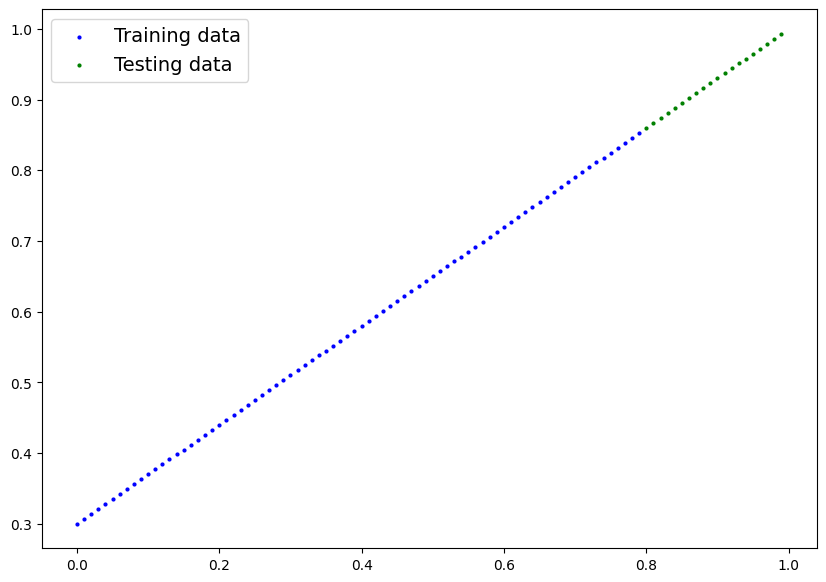

In [146]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression
);

### 5.2 Adjusting `model_1` to fit a straight line

Now we've got some data, lets recreate `model_1` but with a loss function suited to our regression data.

In [147]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

We'll set up the loss function to be `nn.L1Loss()` (the same as mean absolute error) & the optimizer to be `torch.optim.SGD()`.

In [148]:
# Loss & optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

We'll train the model using the regular training loop steps for `epochs=1000`.

In [149]:
# Train the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  # 1. Forward Pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate Loss (no accuracy since it's a regression problem, not a classification problem)
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch %  100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss : {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss : 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss : 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss : 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss : 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss : 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss : 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss : 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss : 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss : 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss : 0.00603


Unlike `model_1` on the classification data, it appears `model_2`'s loss is actually going down.
We'll plot its predictions to verify this is so.

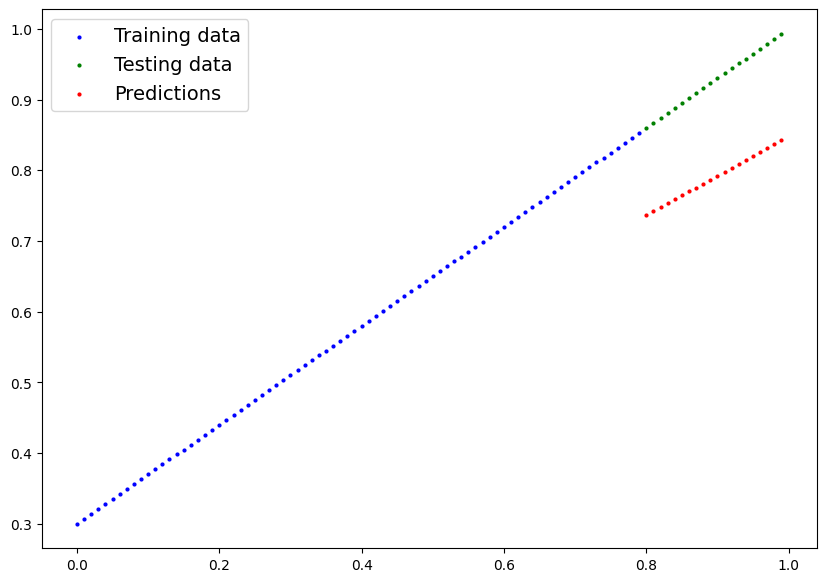

In [150]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Our model is doing better than random guessing on straight lines. This is what we want. I t means our model is able to learn.

## 6. The missing piece: non-linearity

We've seen our model can draw straight(linear) lines, thanks to its linear layers. Now we'll try to have it learn to draw non-straight lines.

### 6.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before.[link text](https://)

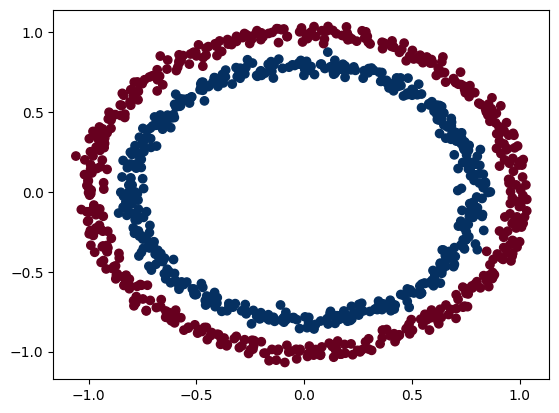

In [151]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

We'll split our data into training and test sets using 80% of the data for training and 20% for testing.

In [152]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Our neural networks have only been using linear (straight) line functions thus far, however our data is non-linear (circles). We'll introduce the capability for our model to use **non-linear activation functions**.
PyTorch has a bunch of ready-made non-linear activation functions that do similar but different things. One of the most comnmon & best performing is ReLu (rectified linear-unit, `torch.nn.ReLu()`). In this next step, we'll put the ReLu function in our neural network between the hidden layers in the forward pass and see what happens.

In [153]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLu activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLu activation function between layers
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


We've got a model ready to go, we'll create a binary classification loss function and an optimizer in the next step.

In [154]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

We have a model, loss function and an optimizer. We'll create a training and testing loop in this step.

In [155]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calc ulate loss and accuracy
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss calculates loss using logits
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
    # 2. Calculate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


Our results look better. i.e loss is decreasing and accuracy is increasing.

### 6.4 Evaluating a model trained with non-linear activation functions

Let's see how our models predictions look now that its been trained on non-linear(circle data) with non-linear activation functions.


In [156]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

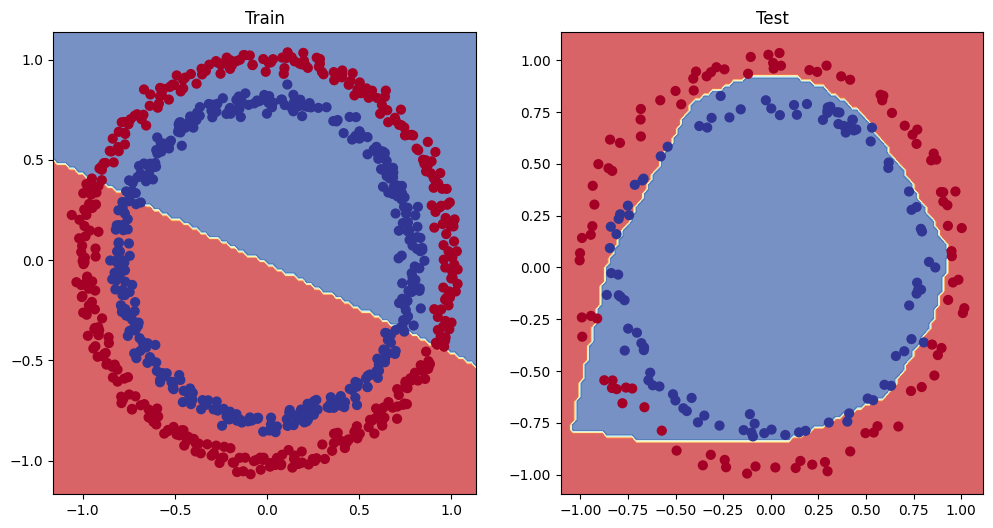

In [157]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear activation functions

We've observed how introducing non-linear activation functions to our model can help it to model non-linear data.

In order to explore non-linear activation functions to understand them better we'll create a small amout of data and attempt to replicate a non-linear activation function scenario.

In [158]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

Our tensor looks like so when plotted:

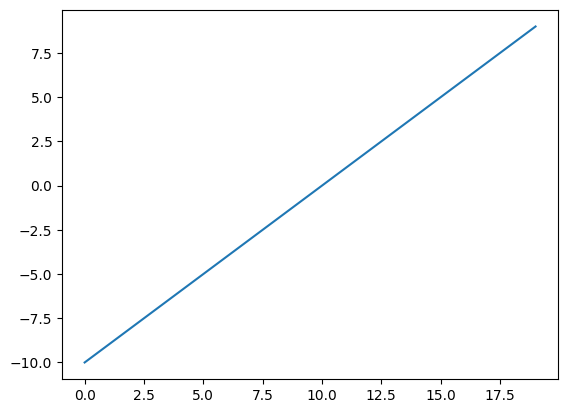

In [159]:
# Visualize the toy tensor
plt.plot(A);

We'll introduce the ReLU activation function to see how it infuences our straight line plot. 
We'll recreate the ReLU function ourselves instaed of using PyTorch's ReLU(`torch.nn.ReLU`). The ReLU function turns all negatives to 0 & leaves the positive values as they are.

In [160]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Our ReLU function worked, all the negative values are now zeros. 
Let's plot our tensor:

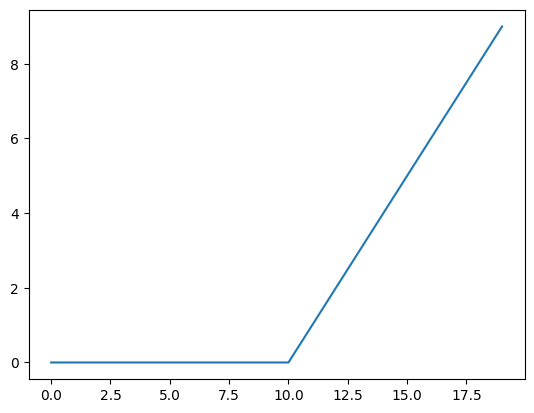

In [161]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

What happens when we introduce the sigmoid function instead?

`S(x) = 1/(1 + e^xi`)

Where S represents sigmoid, e stands for exponential(`torch.exp()`) & i stands for a particular element in a tensor.

We'll build a function with PyTorch to replicate the sigmoid function in the next step

In [162]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

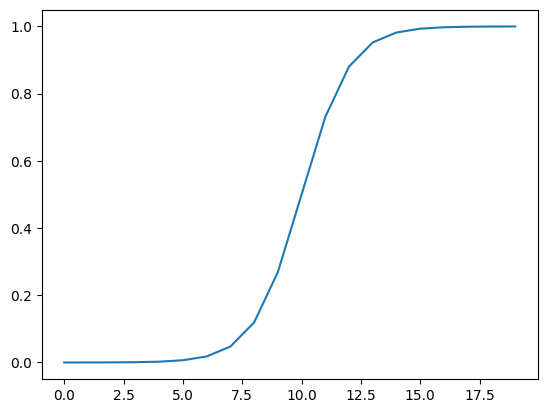

In [163]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

We've gone from a straight line to a curved line by using one of the many non-linear activation functions that exist in PyTorch.

## 8. Building a multi-class PyTorch model 

In this section, we'll put everything we've learned so far together by working on a **multi-class classification** problem.

A multi-class classificatioin problem deals with classifying something from a list of more than two (binary) options.

### 8.1 Creating multi-class classification data

We'll start by creating some multi-class data.
We'll do this by leveraging Scikit-Learn's `make_blobs()` method. This method will create as many classes (using the `centers` parameter) as we want.
Here are the steps:

1. Create some multi-class data with `make_blobs()`.
2. Turn the data into tensors (the default of `make_blobs()` is to use NumPy arrays).
3. Split the data into training and test sets using `train_test_split()`.
4. Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


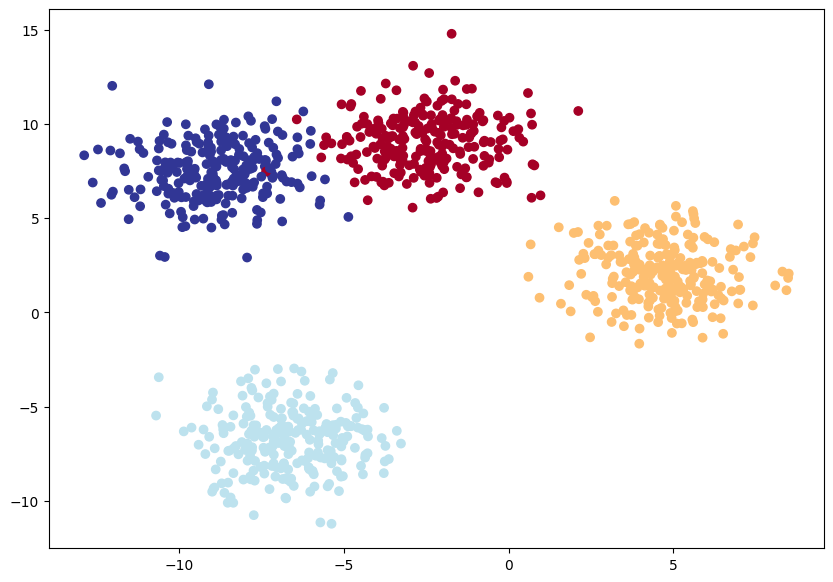

In [164]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # Y labels
    cluster_std=1.5, # give the clusters a little shake up 
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

We successfully created some multi-class data. We'll build a model to separate the colored blobs in the next steps.

### 8.2 Building multi-class classification model in PyTorch

In [165]:
# Create a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [166]:
from torch import nn

# Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes all required hyperparameters for a multi-class classification model.

    Args:
      input_features (int): Number of input features to model.
      out_features (int): Number of output features of the model
        (how many classes there are)
      hidden_units (int): Number od hidden units between layers, default 8.
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(), # <- does our dataset require non-linear layers?
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(), # <- does our dataset require non-linear layers?
        nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
    )

  def forward(self, X):
    return self.linear_layer_stack(X)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Our multi-class model is ready, we'll create a loss function and an optimizer for it in the next step. 

### 8.3 Creating a loss function and optimizer for a multi-class PyTorch model 

Since we are working on a multi-class classification problem, we'll use the `nn.CrossEntropyLoss()` method as our loss function. 
We'll stick with using SGD with a learning rate of 0.1 for optimizing  our `model_4` parameters.

In [167]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model 

WWith our loss function and our optimizer ready, we're ready to train our model. Before we proceed, let's do a single forward pass with our model to see if it works.

In [168]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

It appears we get one value per feature of each sample. We can check the shape to confirm.

In [169]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

We confirm that our model is predicting one value for each class that we have. 
Our model is outputting logits at the moment. In order to figure out exactly which label was giving the sample. i.e. how do we go from `logits -> prediction probabilities -> prediction labels` just like we did with the binary classification problem.
 That's where the softmax activation function comes into play.

 The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

In [170]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


After passing the logits through the softmax function, each individual sample now adds to 1 (or very close to 1).
Let's check:

In [171]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

These prediction probabilities tell us how much the model thinks the target `X` sample(the input) maps to each class.

Since there's one value foe each class in `y_pred_probs`, the index of the highest value is the class the model thinks the specific data sample most belongs to. We can check which index has the highest value using `torch.argmax()`.

In [172]:
# Which class does the model think is *most* likely at the index 0 sample
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


The output of `torch.argmax()` returns 3, so for the features (`X`) of the sample at index 0, the model is predicting that the most likely class value (`y`) is 3.

This is just  random guessing for now so it's got a 25% chance of being right(since there are four classes). We can improve those chances by training the model.

### 8.5 Creating a training and testing loop for a multi-class PyTorch model 

In this step we'll write a training and testing loop to improve and evaluate our model.
Let's train the model for `epochs=100` and evaluate it every 10 epochs.

In [173]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probability -> prediction labels
    # print(y_logits)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)
      
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a multi-class PyTorch model 

Our trained model appears to be performing pretty well.
We'll verify this is the case by making some predictions and visualizing them.

In [174]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

It appears our model's predictions are still in logit form. To evaluate our predictions, they need to be in the same form as our labels(`y_blob_test`), which are in integer form.

We'll convert our model's prediction logits to prediction probabilities(using `torch.softmax()`) then to prediction labels (by taking the `argmax()` of each sample).

In [175]:
# Turn predicted logits into prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Our model predictions are now in the same form as our test labels.
 In the next step, we'll visualize our predictions with `plot_decision_boundary()`, remember that since our data is on the GPU, we'll have to move it to the CPU for use with mathplotlib(`plot_decision_boundary()` does this automatically for us).

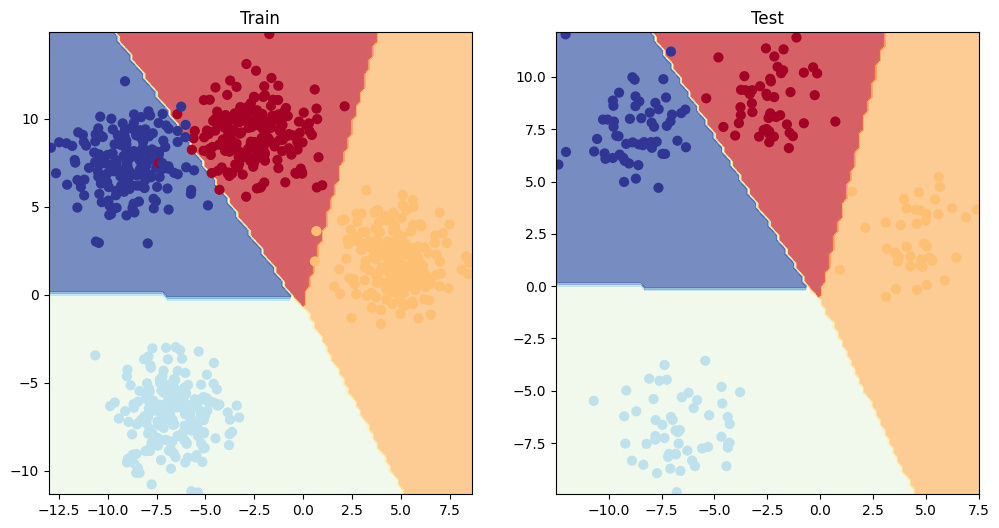

In [176]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# PyTorch Computer Vision

## 0. Computer vision librarties in PyTorch

In [177]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


## 1. Getting a dataset

In [178]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disc
    transform=ToTensor(), # images come as PIL format, we want to turn into tensorTorch s
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15762747.19it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275973.66it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5066378.03it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6933936.09it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Let's check out the first sample of the training data.

In [179]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1. Input and output shapes of a computer vision model

We have a big tensor of values(the image) leading to a single value for the target (the label).
Let's see the image shape.

In [180]:
# what's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:
`[color_channels=1, height=28, width=28]`

In [181]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.
What classes are there?
We can find these via the `.classes` attribute.

In [182]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Observe how we are dealing with 10 different classes(different kind of clothes). This means our problem is multi-class classification.
We'll visualize our data in the next step.

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


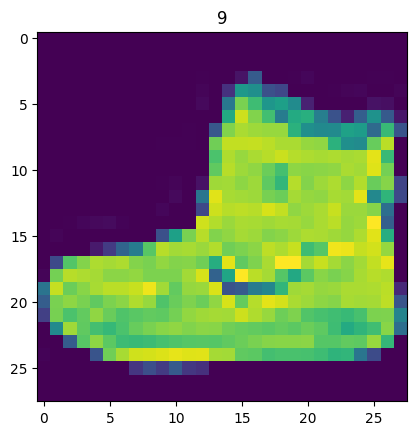

In [183]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (color channels, height, width)
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

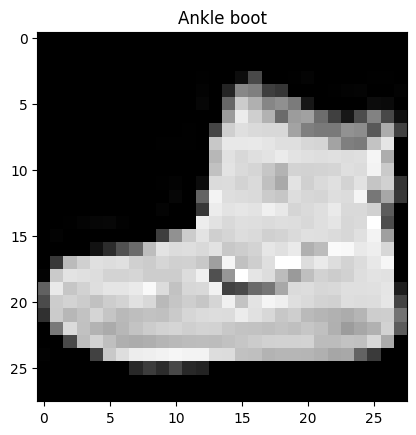

In [184]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Let's plot more images.

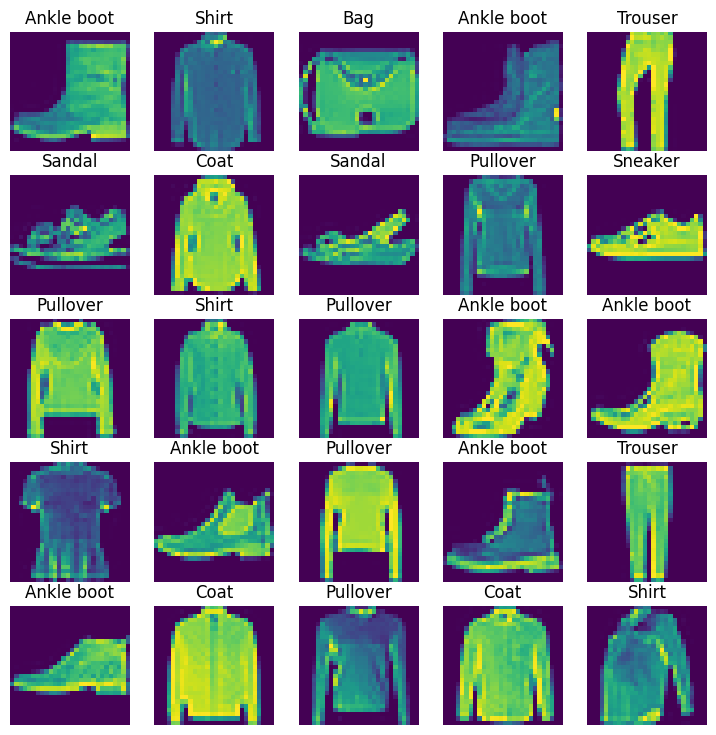

In [185]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  #plt.imshow(img.squeeze(), cmap="gray")
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False);


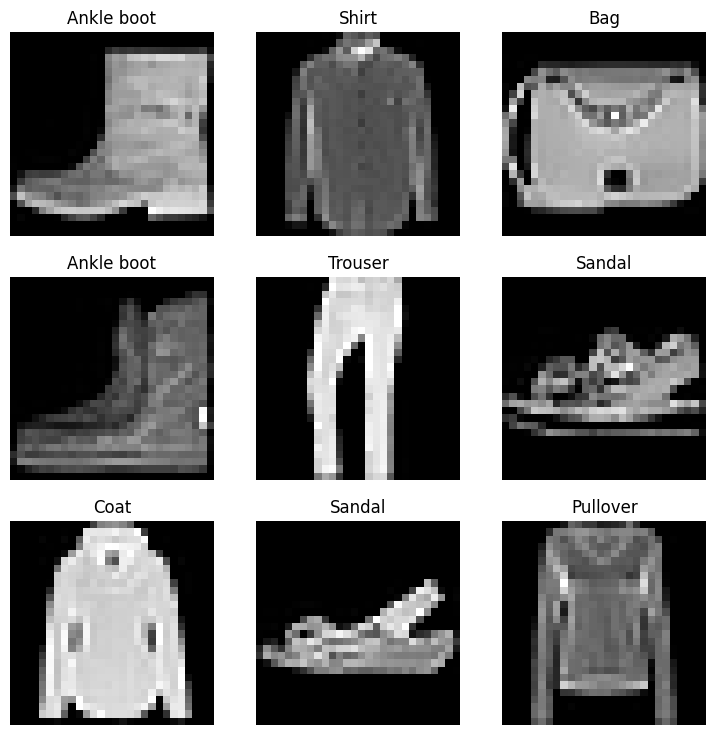

In [186]:
 # Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1): 
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader

Let's create `DataLoader`'s for our training and test sets.

In [187]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't neccessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fea2c5fb070>, <torch.utils.data.dataloader.DataLoader object at 0x7fea2d1d3d30>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [188]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


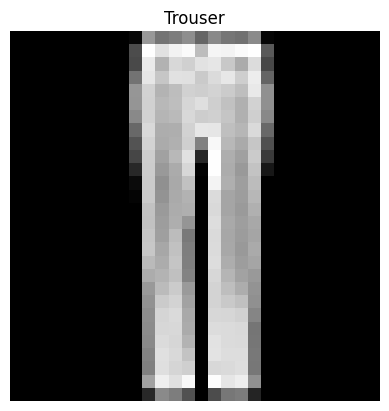

In [189]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

We've loaded our data and prepared it. We'll proceed with building a baseline model by subclassing `nn.module`. A baseline model is used as a starting point which we try to improve upon with subsequent more complicated models.

Our baseline will consist of two `nn.Linear()` layers. Since we're working with image data, we're going to use a different layer, the `nn.Flatten()` layer to start things off. `nn.Flatten()` compresses the dimensions of a tensor into a single vector.

In [190]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`. It turned our pixel data from height and width dimensions into one long **feature vector**.
Inputs for `nn.Linear()` layershave to be in the form of feature vectors. We'll create our first model using `nn.Flatten()` as the first layer in the next step.

In [191]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #neural networks like their inputs in vector format
        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
      return self.layer_stack(x)


We've got a basline model class we can use, now let's instantiate a model.
We'll need to set the following parameters:


*   `input_shape=784`
*   `hidden_units=10`
*   `output_shape=len(class_names)`

Let's create an instance of our model and send it to the CPU for now(we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [192]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1. Setup loss, optimizer and evaluation metrics



In [193]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "row" GitHub URL for this to work
  request = requests.get("")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [194]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Our loss function and optimizer are ready but before we start training our model, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.
We'll train this model on the CPU and the next one on the GPU and compare them. 

Our timing function will import the `timeit.default_timer() function` from the Python `timeit module`.

In [195]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.

  Args:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running on. Defaults to None.

  Returns:
    float: time between start and end in seconds (higher is longer).
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data

We have got some data, a timer, a loss function, an optimizer and a model all set up. We'll create a training loop and a testing loop to train and evaluate our model. We'll be using the same steps as the previous examples but we'll add another loop to loop through our data batches since our data is now in batch form. 
Our data batches are contained within our `DataLoader S`, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

Since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

We'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all.

In [196]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a Loop to Loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate Loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the Loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
          # 1. Forward pass
          test_pred = model_0(X)

          # 2. Calculate  Loss (accumulatively)
          test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

          # 3. Calculate accuracy (preds need to be same as y_true)
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.398 seconds


Our baseline model appears to have done quite well, it didn't take too long to train, even on the CPU.
We'll write some code to evaluate our model in the next step.

## 4. Make predictions on Model 0 results

In [197]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader...

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of the model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
    (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:
        # Make predictions with the model
        y_pred = model(X)

        # Accumulate the loss and accuracy values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1)) # for accuracy, need the prediction labels (Logits -> pred_prob -> pred_labels)

      # Scale Loss and accuracy to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
      loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Our model is looking good. We'll use this dictionary to compare the baseline model results to other models later on.

## 5. Setup device agnostic code

In [198]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [199]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

looks good
We'll instantiate it with the same settings we used before..


In [200]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics:
We'll setup a loss function, an optimizer and an evaluation metric.

In [201]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and testing loops

In [202]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
      # Send data to GPU
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss
      train_acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
                )
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Now we have some functions for training and testing our model. In the next step, we'll run the functions inside another loop for each epoch. We'll also set a timer to see how long our code takes to run on the GPU.

In [203]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 35.776 seconds


Next, we'll evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [204]:
# torch.manual_seed(42)

# # Note: This will throw an error due to `eval_model()` not using device agnostic code
# model_1_results = eval_model(model=model_1,
#     data_loader=test_dataloader,
#     loss_fn=loss_fn,
#     accuracy_fn=accuracy_fn)
# model_1_results

In [205]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluate a given model on a given dataset,

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model is created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
      loss_fn=loss_fn, accuracy_fn=accuracy_fn,
      device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [206]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

From the results we are getting, it looks like adding nonlinearities to our model made it perform worse than the baseline model. It seems like our model is overfitting on the training data. This means our model is learning from the training data but those patterns aren't generalizing to the testing data.
The two ways to fix overfitting are:

1. Using smaller or different model (some models fit certain kinds of data better than others)
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

## 7. Model 2: Building a Convolutional Neural Network(CNN)

In [207]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # how big is the square that's going over the image
                  stride=1, # default
                  padding=1), # options = 'valid' (no padding) or "same" (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride valueis same as kernel_size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:


*   `nn.COnv2d()`, also known as a convolutional layer.
*   `nn.MaxPool2d()`, also known as a max pooling layer.

To test the layers out, let's create some sample data.



In [208]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image foir testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:


*   `in_channels` (int)-Number of channels in the input image.
*   `out_channels` (int)-Number of channels produced by the convolution.


*   `kernel_size` (int or tuple)-Size of the convolving kernel/filter.
*   `stride` (int or tuple, optional)-How big of a step the convolving kernel takes at a time.
Default: 1.


*   `padding` (int, tuple, str)-Padding added to all four sides of input. Default: 0.
*   List item






In [209]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

If we try to pass a single image in, we get a shape mismatch error. This  is because our `nn.Conv2d()` layer expects a 4-dimensional tensor as input with size `(N, C, H, W)` or `[batch_size, color_channels, height, width]` or `[batch_size, color_channels, height, width]`.
Right now our single image `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.
We can fix this for a single image by using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [210]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [211]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

Observe how our shape is altered. We get different channel sizes as well as different pixel sizes.

What if we changed the values of `conv_layer`?

In [212]:
torch.manual_seed(42)
# Create a new conv_layer with different values
conv_layer_2 = nn.Conv2d(in_channels=3, # same numnber of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

We get another shape change. Our image shape becomes `[1, 10, 30, 30]` or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?
Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image by performing operations on the input(our test image) against its internal parameters.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss functions thanks to some help from the optimizer.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [213]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

The shapes of these are manipulated by the inputs we passed to `nn.Conv2d()` when we set it up.
Let's check them out.

In [214]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_sizes=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_sizes=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


###7.2 Stepping through `nn.MaxPool2d()`

Let's see what happens when we move data through `nn.MaxPool2d()`.

In [215]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv =  conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice how the output shape halves from a `62x62` image to a `31x31` image.

### 7.3 Setup a loss function and optimizer for `model_2`
Let's set up a loss function and an optimizer. We'll use `nn.CrossEntropyLoss()` as the loss function(since we're working with multi-class classification data). We'll also use `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.1`.

In [216]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [217]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n----------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
        )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
        )
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3
----------
Train loss: 0.59424 | Train accuracy: 78.48%
Test loss: 0.39765 | Test accuracy: 85.76%

Epoch: 3
----------
Train loss: 0.36194 | Train accuracy: 86.87%
Test loss: 0.35781 | Test accuracy: 86.94%

Epoch: 3
----------
Train loss: 0.32474 | Train accuracy: 88.19%
Test loss: 0.32547 | Test accuracy: 88.22%

Train time on cuda: 44.663 seconds


The convolutional and max pooling layers appear to have helped improve our model's performance a bit. 
We'll evaluate `model_2`'s results with our `eval_model()` function in the next step.

In [218]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32547175884246826,
 'model_acc': 88.21884984025559}

## 8. Compare model results and training time

We have trained 3 diff models so far.
1. `mo0del_0` - our baseline model with 2 `nn.Linear()` layers.
2. `mo0del_1` - similar to our baseline model except with  `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `mo0del_2` - ourfirst CNN model that mimicke the TinyVGL architecture on the CNN Explainer website.

Next we'll combine our model results dictionaries into a DataFrame & find out which performs best.

In [219]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325472,88.218850


We'll add the training times as well.

In [220]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.397649
1,FashionMNISTModelV1,0.685001,75.019968,35.776101
2,FashionMNISTModelV2,0.325472,88.218850,44.663325


Our CNN(`FashionMNISTModelV2`) appear to have performed the best with the lowest loss and the highest accuracy, however it had the longest training time.

Our baseline model (`FashionMNISTModelV0`) also performed better than `model_1` (`FashionMNISTModelV1`).

Generally you get better performance out of a larger, more complex model(like we did with `model_2`) but this increased performance often comes at a sacrifice of training and inference speed.

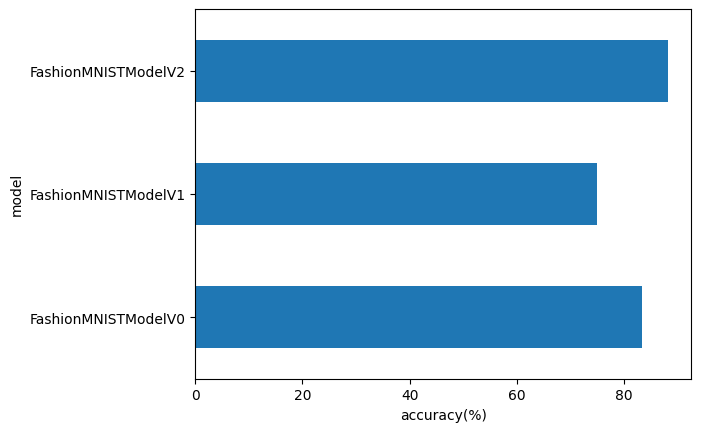

In [221]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

After comparing our models to each other, the next logical step is to evaluate our best performing model, `model_2`.

We'll create a function `make_predictions()` to pass in the model and some data to make predictions on.  

In [222]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
          # Prepare sample
          sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

          # Forward pass (model outputs raw logit)
          pred_logit = model(sample)

          # Get prediction probability (logit -> prediction probability)
          pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

          # Get pred_prob off GPU for further calculations
          pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [223]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


Now we can use our `make_predictions()` function to predict on `test_samples`.

In [224]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                            data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[7.9720e-07, 1.7419e-07, 4.5230e-07, 4.7462e-07, 2.8901e-08, 9.9974e-01,
         3.6849e-07, 2.1083e-05, 3.2642e-05, 2.0407e-04],
        [3.2456e-02, 6.7619e-01, 1.6977e-03, 6.7904e-02, 9.0050e-02, 4.4953e-04,
         1.3033e-01, 1.7178e-04, 1.2294e-04, 6.3205e-04]])

We can now go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` of the `torch.softmax()` activation function.

In [225]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [226]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Now that our predicted classes are in the same format as our test labels, we can compare them.
We'll visualize our image data in the next step.


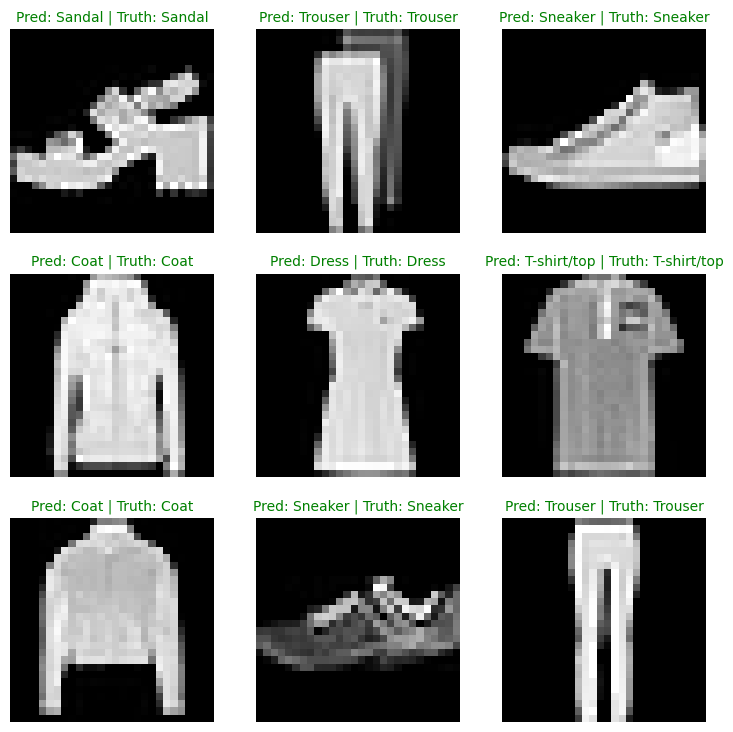

In [227]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title color accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c='g') # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

One of the most visual evaluation metrics we can use for classification problems is a confusion matrix. A confusion matrix shows where a classification model got confused between predictions and labels.

We'll go through the following steps to create a confusion matrix:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels)
2. Make a confusion matrix using `torch.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

We'll start by making predictions with our trained model.

In [228]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction_probabilities -> prediction_labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Now that we have predictions, we'll execute the next 2 steps:

2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

We need to ensure we  have installed `torchmetrics` and `mlxtend` as we need these to create a confusion matrix.

In [229]:
# See if torchmetrics exists, install if it isn't
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you are using google colab, this might require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [230]:
# Import mlxtend upgraded vesion
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


To create a confusion matrix we'll first need to create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

THen we'll create a confusion matrix(in tensor format) by passing our instamnce our model's predictions(`preds=y_pred_tensor`) and targets (`target=test_data.targets`).
Finally we can plot our confusion matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

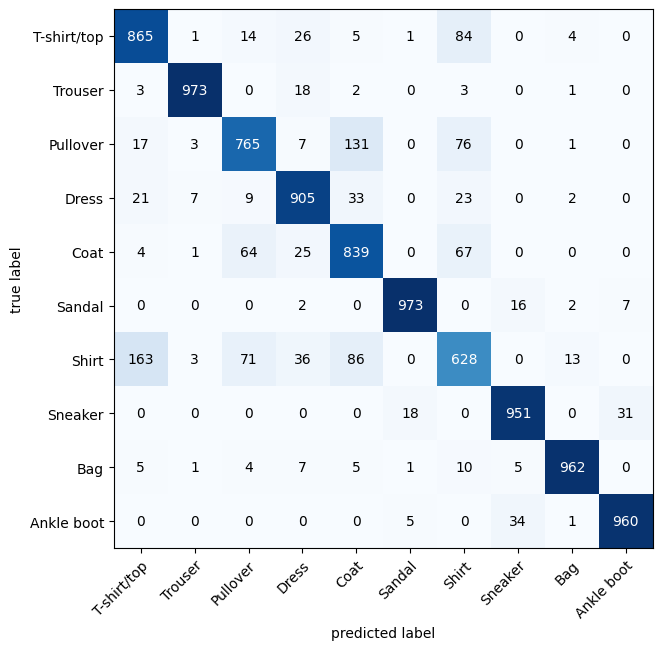

In [231]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # Turn the row and column labels into class names
    figsize=(10, 7)
);

## 11. Save and load best performing model

We can save our PyTorch model using a combination of:
* `torch.save`
* `torch.load`
* `torch.nn.Module.load_state_dict()`

Let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load were successfully done.

In [2]:
from pathlib import Path

# Create models directory (if it doesn't already exist), 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

# 

Saving model to: models/03_pytorch_computer_vision_model_2.pth


NameError: ignored

Now we have a saved model `state_dict()`, we can load it back in using a combination of `load_state_dict()` and `torch.load()`.
Since we are using `loiad_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [233]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes do not match the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU 
loaded_model_2 = loaded_model_2.to(device)

Now that we have a loaded model, we can evaluate it with `eval_model()` tyo ensure its parameters work similarly to `model_2` prior to saving it.

In [234]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32547175884246826,
 'model_acc': 88.21884984025559}

Compare these results with `model_2_results`. Do they look the same?

In [235]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32547175884246826,
 'model_acc': 88.21884984025559}

We can find out if two tensors are close to each other using `torch.isClose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance). The output of `torch.isClose()` should be true if our model's results are close.

In [236]:
# Check to see if results are close to each other(if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

#**PyTorch Using my own Datasets**

In [3]:
# Preparing the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear within our code
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

In [4]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/infra_data/myb1-2018-cement.csv")
df.dropna()
df
# df.shape

,TABLE 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"SALIENT CEMENT STATISTICS1, 2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(Thousand metric tons unless otherwise specified),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN,2018,NaN
5,United States:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Production:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cement3,NaN,NaN,"82,535",NaN,"84,405",NaN,"84,695",NaN,"86,356",NaN,"86,400",NaN
8,Clinker,NaN,NaN,"74,372",NaN,"76,043",NaN,"75,633",NaN,"76,678",NaN,"77,112",NaN
9,"Shipments from mills and terminals:3, 4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##0. Import PyTorch and set up device-agnostic code

In [5]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.0.0+cu118'

In [6]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
import torch
import torchvision 

# assert int(torch.__version__.split(".")[1]) >= 11
assert int(torchvision.__version__.split(".")[1]) >= 11

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

In [13]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [00:48<00:00, 102370342.73it/s]


Extracting ../data/food-101.tar.gz to ../data


##1. Get data

In [8]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("/content/drive/MyDrive/Colab Notebooks/data")
image_path = data_path / "churros_baklava_beignets"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download churros, baklava, beignets data
    with open(data_path / "churros_baklava_beignets.zip", "wb") as f:
        request = requests.get("https://github.com/MMoronto/pytorch_exercises/raw/main/data/churros_baklava_beignets.zip")
        print("Downloading churros, baklava, beignets data...")
        f.write(request.content)

    # Unzip churros, baklava, beignets data
    with zipfile.ZipFile(data_path / "churros_baklava_beignets.zip", "r") as zip_ref:
        print("Unzipping churros, baklava, beignets data...") 
        zip_ref.extractall(image_path)

/content/drive/MyDrive/Colab Notebooks/data/churros_baklava_beignets directory exists.


##2. Prepare data

In [9]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
walk_through_dir(image_path)

There are 0 directories and 1 images in '/content/drive/MyDrive/Colab Notebooks/data/churros_baklava_beignets'.


In [11]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/content/drive/MyDrive/Colab Notebooks/data/churros_baklava_beignets/train'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/data/churros_baklava_beignets/test'))

In [12]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

IndexError: ignored

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

##Transform data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


###3.1 Transform data with `torchvision.transforms`

We've got folders of images but before we can use them with PyTorch, we need to convert them into tensors.

One of the ways we can do this is by using the `torchvision.transforms` module.

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

##4. Option 1: Loading Image Data Using ImageFolder

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict